# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

## Get the data

In [1]:
# he unzips the file from googleapi.com and gets the file locally. He did:

# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
# I already downloaded the files from: https://github.com/mrdbourke/tensorflow-deep-learning?tab=readme-ov-file
# This data was already formatted by another notebook he made: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

# So i already have the data in the folder: /Datasets/pizza_steak

## Inspect the data

In [8]:
!ls ../Datasets/pizza_steak/train/pizza

1008104.jpg 1638227.jpg 2235981.jpg 2774899.jpg 3464027.jpg 576236.jpg
1008144.jpg 1646974.jpg 2236914.jpg 2775763.jpg 3464858.jpg 5764.jpg
1008844.jpg 1649108.jpg 2241448.jpg 2778214.jpg 3473991.jpg 579691.jpg
1008941.jpg 1649276.jpg 2247711.jpg 277963.jpg  3475936.jpg 593400.jpg
1011404.jpg 1652943.jpg 2253670.jpg 2785084.jpg 3478964.jpg 59445.jpg
102037.jpg  1654444.jpg 2255361.jpg 2793535.jpg 3479875.jpg 596494.jpg
1026922.jpg 1660415.jpg 2274117.jpg 27963.jpg   3479936.jpg 598381.jpg
1029698.jpg 1663749.jpg 2279642.jpg 2800325.jpg 3484590.jpg 604977.jpg
1033251.jpg 1665654.jpg 2280345.jpg 2811032.jpg 3493457.jpg 608085.jpg
1035854.jpg 166823.jpg  2285269.jpg 282013.jpg  349946.jpg  618021.jpg
1038357.jpg 1670471.jpg 2285942.jpg 2821034.jpg 350358.jpg  61822.jpg
1040878.jpg 1671531.jpg 228778.jpg  2821048.jpg 3505182.jpg 618348.jpg
1044524.jpg 1678284.jpg 2291093.jpg 2827938.jpg 3512070.jpg 625687.jpg
1044789.jpg 1681043.jpg 2292986.jpg 2831983.jpg 3514408.jpg 626170.jpg
1047561.jp

In [12]:
import os

# walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("../Datasets/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# Some directories have .DS_store in them. But basically we have 250 pictures for test for each pizza and steak and 750 for training for each

There are 2 directories and 1 images in ../Datasets/pizza_steak
There are 2 directories and 0 images in ../Datasets/pizza_steak/test
There are 0 directories and 250 images in ../Datasets/pizza_steak/test/steak
There are 0 directories and 250 images in ../Datasets/pizza_steak/test/pizza
There are 2 directories and 0 images in ../Datasets/pizza_steak/train
There are 0 directories and 750 images in ../Datasets/pizza_steak/train/steak
There are 0 directories and 750 images in ../Datasets/pizza_steak/train/pizza


In [13]:
!ls -la ../Datasets/pizza_steak

# .DS_Store appears as a image?

total 16
drwxr-xr-x@ 5 alejandrocortes  staff   160 May  9 07:04 .
drwxr-xr-x  4 alejandrocortes  staff   128 May  9 07:04 ..
-rw-r--r--@ 1 alejandrocortes  staff  6148 May  9 07:04 .DS_Store
drwxr-xr-x@ 4 alejandrocortes  staff   128 Aug 20  2020 test
drwxr-xr-x@ 4 alejandrocortes  staff   128 Aug 20  2020 train


In [15]:
# Another way to find out how many images in a file:

num_steak_images_train = len(os.listdir("../Datasets/pizza_steak/train/steak"))
num_steak_images_train

750

## Visualizing our Images

In [18]:
# Get the class names programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("../Datasets/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creates a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [22]:
for item in data_dir.glob("*"):
    print(item, item.name, type(item))

../Datasets/pizza_steak/train/steak steak <class 'pathlib.PosixPath'>
../Datasets/pizza_steak/train/pizza pizza <class 'pathlib.PosixPath'>


In [48]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (view images from here):
    target_folder = target_dir + target_class

    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)  # Randomly sample 1 item from the items in os.listdir(target_folder)

    #Read in the image and plot it
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


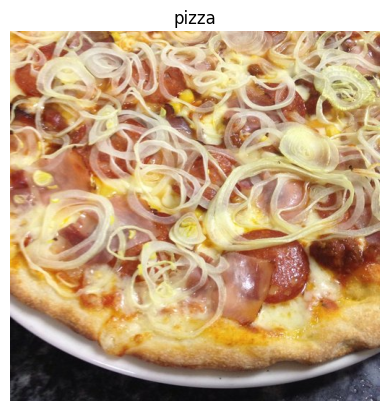

In [50]:
img = view_random_image(target_dir="../Datasets/pizza_steak/train/", 
                        target_class= "pizza")

In [51]:
img

array([[[249, 200, 141],
        [253, 207, 148],
        [255, 219, 160],
        ...,
        [251, 239, 181],
        [255, 248, 192],
        [255, 249, 193]],

       [[235, 188, 120],
        [236, 191, 124],
        [243, 202, 136],
        ...,
        [217, 198, 139],
        [219, 203, 144],
        [221, 205, 146]],

       [[222, 180,  96],
        [220, 178,  94],
        [221, 180,  98],
        ...,
        [218, 188, 124],
        [217, 187, 123],
        [224, 194, 130]],

       ...,

       [[ 52,  53,  58],
        [ 44,  45,  50],
        [ 37,  38,  43],
        ...,
        [103, 106, 123],
        [103, 109, 125],
        [111, 117, 133]],

       [[ 63,  64,  69],
        [ 51,  52,  57],
        [ 40,  41,  46],
        ...,
        [111, 114, 129],
        [103, 109, 123],
        [104, 110, 124]],

       [[ 51,  52,  57],
        [ 42,  43,  48],
        [ 35,  36,  41],
        ...,
        [ 81,  84,  99],
        [ 74,  80,  94],
        [ 93,  99, 113]]

In [54]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[249, 200, 141],
        [253, 207, 148],
        [255, 219, 160],
        ...,
        [251, 239, 181],
        [255, 248, 192],
        [255, 249, 193]],

       [[235, 188, 120],
        [236, 191, 124],
        [243, 202, 136],
        ...,
        [217, 198, 139],
        [219, 203, 144],
        [221, 205, 146]],

       [[222, 180,  96],
        [220, 178,  94],
        [221, 180,  98],
        ...,
        [218, 188, 124],
        [217, 187, 123],
        [224, 194, 130]],

       ...,

       [[ 52,  53,  58],
        [ 44,  45,  50],
        [ 37,  38,  43],
        ...,
        [103, 106, 123],
        [103, 109, 125],
        [111, 117, 133]],

       [[ 63,  64,  69],
        [ 51,  52,  57],
        [ 40,  41,  46],
        ...,
        [111, 114, 129],
        [103, 109, 123],
        [104, 110, 124]],

       [[ 51,  52,  57],
        [ 42,  43,  48],
        [ 35,  36,  41],
        ...,
        [ 81,  84,  9

In [55]:
img.shape   

(512, 512, 3)

In [56]:
# Get all the pixel values between zero and one.

img/255.

array([[[0.97647059, 0.78431373, 0.55294118],
        [0.99215686, 0.81176471, 0.58039216],
        [1.        , 0.85882353, 0.62745098],
        ...,
        [0.98431373, 0.9372549 , 0.70980392],
        [1.        , 0.97254902, 0.75294118],
        [1.        , 0.97647059, 0.75686275]],

       [[0.92156863, 0.7372549 , 0.47058824],
        [0.9254902 , 0.74901961, 0.48627451],
        [0.95294118, 0.79215686, 0.53333333],
        ...,
        [0.85098039, 0.77647059, 0.54509804],
        [0.85882353, 0.79607843, 0.56470588],
        [0.86666667, 0.80392157, 0.57254902]],

       [[0.87058824, 0.70588235, 0.37647059],
        [0.8627451 , 0.69803922, 0.36862745],
        [0.86666667, 0.70588235, 0.38431373],
        ...,
        [0.85490196, 0.7372549 , 0.48627451],
        [0.85098039, 0.73333333, 0.48235294],
        [0.87843137, 0.76078431, 0.50980392]],

       ...,

       [[0.20392157, 0.20784314, 0.22745098],
        [0.17254902, 0.17647059, 0.19607843],
        [0.14509804, 0

## Build end-to-end example

In [108]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [169]:
# THIS ONE DOES NOT WORK WELL SINCE IMAGEDATAGENERATOR IS DEPRECATED

# PROBLEM IS IN: steps_per_epoch and validation_steps. Comment it and it will work


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data:
train_datagen =  ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

# Setup paths to directory
train_dir = "/Users/alejandrocortes/Documents/Courses/Udemy Courses/Tensorflow_Course/tensorflow-deep-learning/Datasets/pizza_steak/train"
test_dir = "/Users/alejandrocortes/Documents/Courses/Udemy Courses/Tensorflow_Course/tensorflow-deep-learning/Datasets/pizza_steak/test"

# Import train data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42) 

# Build a CNN model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"), # The same as the layer before
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss = "BinaryCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, #This is from an object of ImageGenerator so it already gives us X and Y and labels
                        validation_data = valid_data,
                        epochs = 5,
                        # steps_per_epoch = len(train_data), # This is equal to the total number of images / 32 images per batches. 
                        # validation_steps = len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.5520 - loss: 0.6636 - val_accuracy: 0.8260 - val_loss: 0.4028
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7982 - loss: 0.4432 - val_accuracy: 0.8440 - val_loss: 0.3799
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8224 - loss: 0.4129 - val_accuracy: 0.8280 - val_loss: 0.4114
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7952 - loss: 0.4729 - val_accuracy: 0.8620 - val_loss: 0.3616
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8393 - loss: 0.3928 - val_accuracy: 0.8300 - val_loss: 0.4097


In [156]:
# # With help of ChatGPT
# THIS WORKSSSS

# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.preprocessing import LabelEncoder

# # Define the paths to your data directories
# train_dir = "/Users/alejandrocortes/Documents/Courses/Udemy Courses/Tensorflow_Course/tensorflow-deep-learning/Datasets/pizza_steak/train"
# valid_dir = "/Users/alejandrocortes/Documents/Courses/Udemy Courses/Tensorflow_Course/tensorflow-deep-learning/Datasets/pizza_steak/test"

# # Function to load and preprocess images from a directory
# def load_images_from_directory(directory, target_size=(224, 224)):
#     images = []
#     labels = []
#     label_encoder = LabelEncoder()  # Initialize label encoder
#     for label in os.listdir(directory):
#         label_dir = os.path.join(directory, label)
#         for img_file in os.listdir(label_dir):
#             img_path = os.path.join(label_dir, img_file)
#             # Load image and resize
#             img = load_img(img_path, target_size=target_size)
#             # Convert image to array and normalize pixel values
#             img_array = img_to_array(img) / 255.0
#             images.append(img_array)
#             labels.append(label)
#     # Encode labels as integers
#     labels = label_encoder.fit_transform(labels)
#     return np.array(images), np.array(labels)

# # Load and preprocess training data
# X_train, y_train = load_images_from_directory(train_dir)

# # Load and preprocess validation data
# X_valid, y_valid = load_images_from_directory(valid_dir)

# # Define the CNN model
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# # Compile the model
# model.compile(loss="binary_crossentropy",
#               optimizer="adam",
#               metrics=["accuracy"])

# # Train the model
# history = model.fit(X_train, y_train,
#                     validation_data=(X_valid, y_valid),
#                     epochs=5,
#                     batch_size= 32
#                     )

In [170]:
model_1.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_184 (Conv2D)             │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_185 (Conv2D)             │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_186 (Conv2D)             │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_187 (Conv2D)             │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate model from previous section to see if it works with our image data

In [192]:
# set random seed

tf.random.set_seed(42)

# Create a model to replicate

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), # again error with this steps_per_epoch and also if i use validation_steps
                        )


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6290 - loss: 1.9826 - val_accuracy: 0.7720 - val_loss: 0.5733
Epoch 2/5


2024-05-18 17:11:10.040448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 17:11:10.040463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_6/_5]]
2024-05-18 17:11:10.040473: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3220457226738697310
2024-05-18 17:11:10.040481: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7172258955955376629
2024-05-18 17:11:10.040484: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6698908590323258840
2024-05-18 17:11:10.040489: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7720 - val_loss: 0.5733
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7191 - loss: 0.7881 - val_accuracy: 0.7900 - val_loss: 0.4806
Epoch 4/5


2024-05-18 17:11:14.560227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 17:11:14.560243: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3220457226738697310
2024-05-18 17:11:14.560248: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6698908590323258840
2024-05-18 17:11:14.560253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_22]]
2024-05-18 17:11:14.560284: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7172258955955376629
2024-05-18 17:11:14.560290: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1583785224

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7900 - val_loss: 0.4806
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.7850 - loss: 0.5044 - val_accuracy: 0.6140 - val_loss: 0.9809


In [172]:
model_2.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_53 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

### Try again but with a more complex NN model

In [175]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss = "BinaryCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5418 - loss: 9.9490 - val_accuracy: 0.7080 - val_loss: 1.1905
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7150 - loss: 0.9460 - val_accuracy: 0.7780 - val_loss: 0.4672
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7273 - loss: 0.6079 - val_accuracy: 0.6220 - val_loss: 0.8738
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7425 - loss: 0.6007 - val_accuracy: 0.6980 - val_loss: 0.6044
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.7825 - loss: 0.4983 - val_accuracy: 0.7340 - val_loss: 0.5927


In [176]:
model_3.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_55 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,189,305 (172.38 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,126,204 (114.92 MB)

## Binary Classification: Let's break it down

### 1. Become one with the data: Visualize, visualize, visualize

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


[]

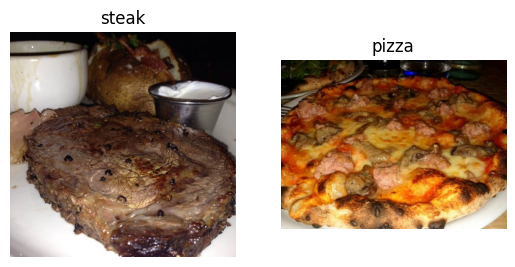

In [182]:
# Visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("../Datasets/pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("../Datasets/pizza_steak/train/","pizza")
plt.plot()

### 2. Preprocess the data

In [183]:
# Define the directory of train and test

train_dir = "../Datasets/pizza_steak/train/"
test_dir = "../Datasets/pizza_steak/test/"

In [185]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [221]:
# Load in our image data from directories and load them into batches

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory= test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [207]:
# Get a sample of a training data batch

#images, labels = train_data.next() # Deprecated
images, labels = next(train_data)  # We have to use next() : next() is indeed a built-in Python function. It's used to retrieve the next item from an iterator or an iterable object.
len(images), len(labels)

(32, 32)

In [208]:
len(train_data)

47

In [218]:
#Get the first 2 images
images[:2], images[0].shape

(array([[[[0.8745099 , 0.87843144, 1.        ],
          [0.8313726 , 0.8352942 , 0.9568628 ],
          [0.74509805, 0.7411765 , 0.86274517],
          ...,
          [0.5137255 , 0.52156866, 0.6117647 ],
          [0.62352943, 0.6392157 , 0.74509805],
          [0.6666667 , 0.6862745 , 0.80392164]],
 
         [[0.7607844 , 0.76470596, 0.882353  ],
          [0.8313726 , 0.8352942 , 0.95294124],
          [0.7725491 , 0.7725491 , 0.882353  ],
          ...,
          [0.6509804 , 0.654902  , 0.76470596],
          [0.65882355, 0.67058825, 0.8000001 ],
          [0.59607846, 0.6039216 , 0.75294125]],
 
         [[0.7568628 , 0.7568628 , 0.86666673],
          [0.79215693, 0.79215693, 0.90196085],
          [0.76470596, 0.75294125, 0.8588236 ],
          ...,
          [0.6666667 , 0.6666667 , 0.8000001 ],
          [0.5647059 , 0.5647059 , 0.7137255 ],
          [0.6       , 0.60784316, 0.7686275 ]],
 
         ...,
 
         [[0.67058825, 0.77647066, 0.49803925],
          [0.34901

### Create a CNN model: Start with the baseline

In [225]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [237]:
# Baseline 3 layer CNN

model_4 = Sequential([
    Conv2D(filters = 10, 
           kernel_size= 3, 
           padding= "valid", #if valid, output shape gets compressed, but if "same" output shape is same as input shape
           activation= "relu",
           input_shape = (224,224,3)), 
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [238]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [239]:
len(train_data), len(test_data)

(47, 16)

In [240]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        # steps_per_epoch = len(train_data), # Again the same error, most likely due to version error of Tensorflow
                        # validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.5624 - loss: 0.9612 - val_accuracy: 0.8060 - val_loss: 0.4149
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8260 - loss: 0.4115 - val_accuracy: 0.8420 - val_loss: 0.3907
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9007 - loss: 0.2775 - val_accuracy: 0.8480 - val_loss: 0.3641
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9719 - loss: 0.1451 - val_accuracy: 0.8040 - val_loss: 0.4311
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9942 - loss: 0.0527 - val_accuracy: 0.8400 - val_loss: 0.4417


In [241]:
# Comparing with the first model
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8247 - loss: 0.4049


[0.40973013639450073, 0.8299999833106995]

### Evaluate our model

<Axes: >

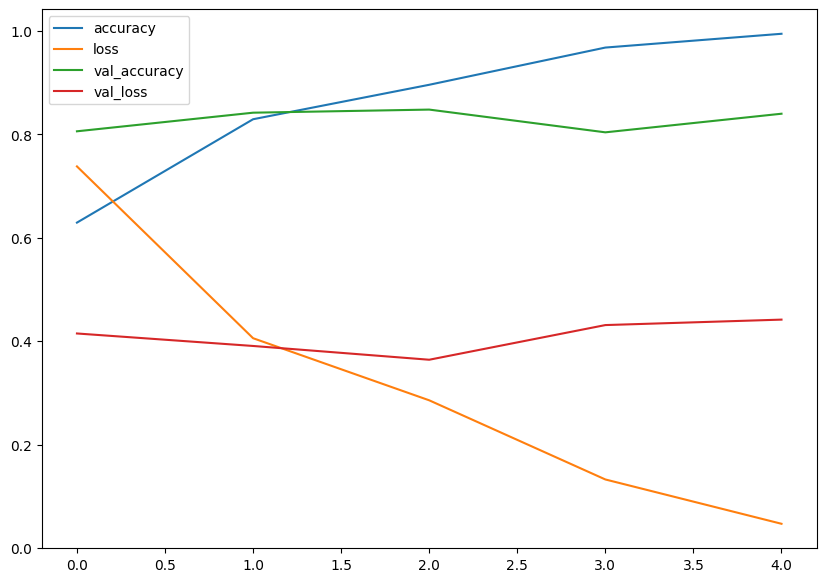

In [242]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [253]:
# Plot the visualization curves and training curves separately

def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #Plot loss
    plt.plot(epochs, loss, label = "Training Loss")
    plt.plot(epochs, val_loss, label = "Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label = "Training Accuracy")
    plt.plot(epochs, val_accuracy, label = "Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

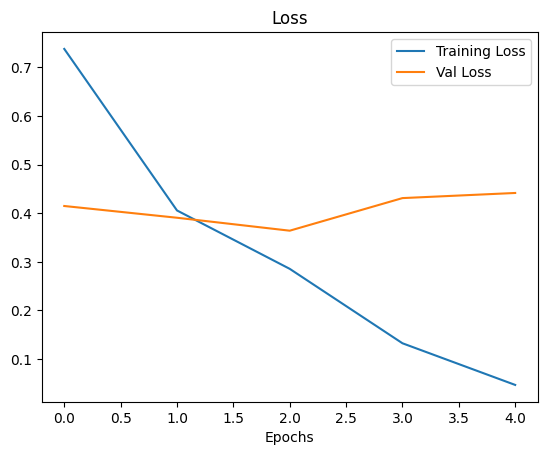

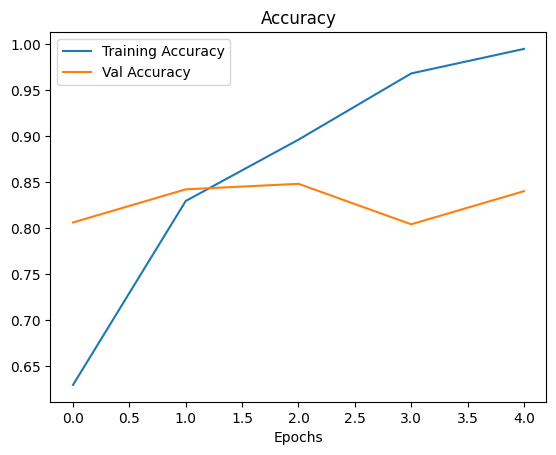

In [254]:
plot_loss_curves(history_4)

### Adjust the model parameters

In [255]:
# Create the model (new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data,
                        validation_data = test_data,
                        epochs = 5)

/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.5783 - loss: 0.6973 - val_accuracy: 0.7780 - val_loss: 0.4771
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7906 - loss: 0.4632 - val_accuracy: 0.8160 - val_loss: 0.4050
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8275 - loss: 0.4105 - val_accuracy: 0.8560 - val_loss: 0.3621
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8348 - loss: 0.3855 - val_accuracy: 0.8560 - val_loss: 0.3519
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8342 - loss: 0.3715 - val_accuracy: 0.8600 - val_loss: 0.3657


In [256]:
model_5.summary()

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_197 (Conv2D)             │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_198 (Conv2D)             │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_199 (Conv2D)             │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_61 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

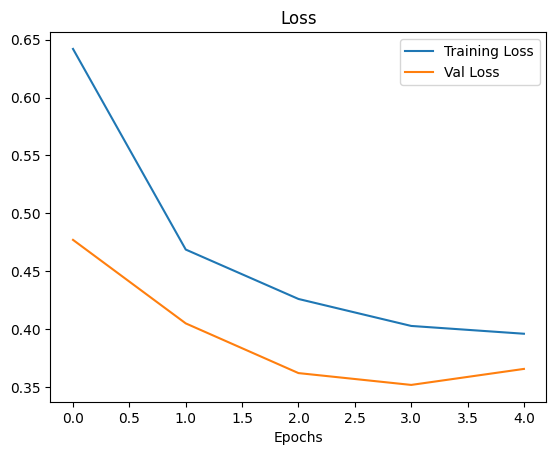

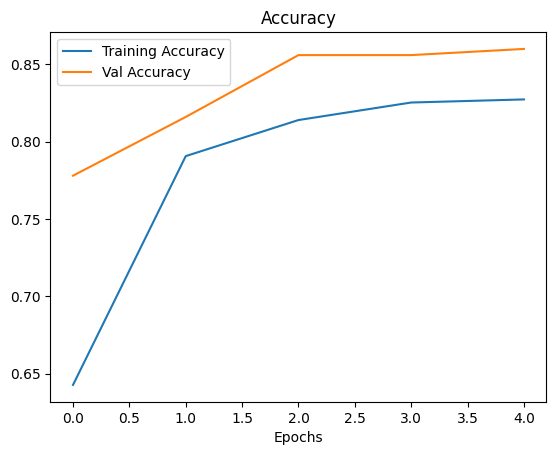

In [258]:
# Plot loss curve

plot_loss_curves(history_5)

### Data augmentation

In [263]:
# Create ImageDataGenerator with Data Augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [264]:
# Import data and augment it from training directory

print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) #For demonstration purposes only

# Create non augmented train data batches
print("Non-Augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False) #For demonstration purposes only

print("Non-Augmented Testing Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               )



Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Testing Data
Found 500 images belonging to 2 classes.


In [265]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

Showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

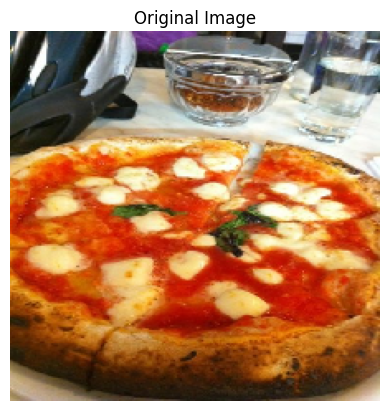

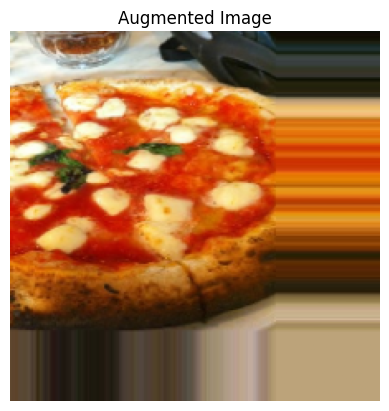

In [273]:
# Show the original images and augmented images

import random
random_number = random.randint(0,32) #batches of 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [274]:
# Create a model to run it with the augmented data

model_6 = Sequential([
  Conv2D(10, 3, activation= "relu"),
  MaxPool2D(pool_size= 2),
  Conv2D(10, 3, activation= "relu"),
  MaxPool2D(2),
  Conv2D(10, 3, activation= "relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation= "sigmoid")
 ])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        validation_data = test_data,
                        epochs = 5,
                        # steps_per_epoch = len(train_data_augmented),
                        # validation_steps = len(test_data)
                        )

Epoch 1/5


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.4849 - loss: 0.7444 - val_accuracy: 0.5400 - val_loss: 0.6892
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.4625 - loss: 0.6952 - val_accuracy: 0.5040 - val_loss: 0.6876
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.5470 - loss: 0.6875 - val_accuracy: 0.6080 - val_loss: 0.6677
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.6613 - loss: 0.6779 - val_accuracy: 0.5100 - val_loss: 0.6805
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.5064 - loss: 0.6979 - val_accuracy: 0.7760 - val_loss: 0.6690


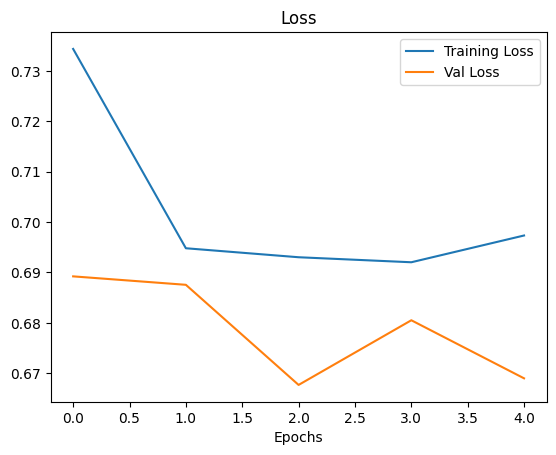

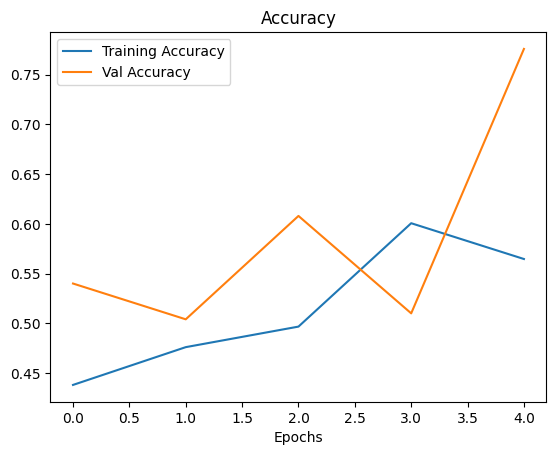

In [275]:
plot_loss_curves(history_6)

### Let's shuffle our augmented training data to see if we can perform better

In [276]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [277]:
# Create model same as model 5 and model 6. Now we are tweaking the data, specifically the augmented data and we shuffled it.

model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        validation_data = test_data,
                        epochs = 5,
                        # steps_per_epoch = len(train_data_augmented),
                        # validation_steps = len(test_data)
                        )

Epoch 1/5


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.5771 - loss: 0.6743 - val_accuracy: 0.7740 - val_loss: 0.5449
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.6902 - loss: 0.5894 - val_accuracy: 0.8140 - val_loss: 0.4508
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.7304 - loss: 0.5399 - val_accuracy: 0.8300 - val_loss: 0.3809
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.7474 - loss: 0.5072 - val_accuracy: 0.8640 - val_loss: 0.3791
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.7738 - loss: 0.4810 - val_accuracy: 0.8500 - val_loss: 0.3603


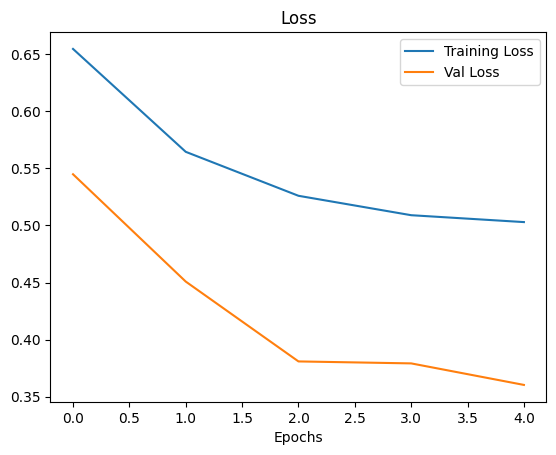

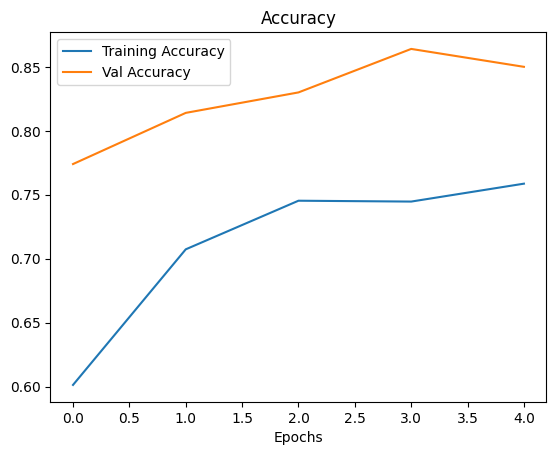

In [278]:
plot_loss_curves(history_7)

## Making a prediction with our trained model with our own custom data

(-0.5, 3023.5, 4031.5, -0.5)

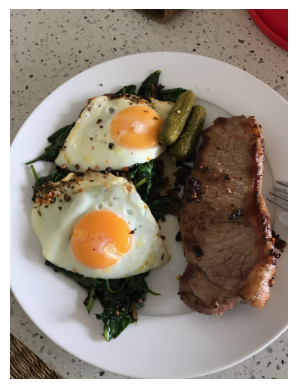

In [292]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("../03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [293]:
steak.shape

(4032, 3024, 3)

### We need to resize our image and add one more dimension (batches)

In [301]:
def load_and_preprocess_data(filename, img_shape = 224):
    # read the image
    img = tf.io.read_file(filename)

    #decode the image into tensor
    img = tf.image.decode_image(img)

    # resize the image
    img = tf.image.resize(img, size=[img_shape,img_shape])

    # rescale the image between 0 and 1
    img = img / 255

    return img

In [303]:
# load in and preprocess our custom image:

steak = load_and_preprocess_data("../03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [306]:
# model_7.predict(steak) # will get error since our model is expecting 4 dimensions (including batch size)

# could have also included this in the definition of load_and_preprocess_data()

expanded_steak = tf.expand_dims(steak, axis = 0)

In [309]:
pred = model_7.predict(expanded_steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[0.75277865]], dtype=float32)

### Now we want to look at the answer not as number + giving the picture

In [308]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [314]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [328]:
def predict_and_plot(model, filename, class_names = class_names):

    #import the image with tensorflow and return as tensor
    img = load_and_preprocess_data(filename)

    #predict with the tensor, but expand dimensions because previous function gives 3 dimensions but missing batch_size ('None' for only 1 pic)
    prediction = model.predict(tf.expand_dims(img, axis = 0))

    # get the correct class name from class_names
    predicted_class = class_names[int(tf.round(prediction))]

    #Plot the image
    plt.imshow(img)
    plt.title(f"Predicted image is {predicted_class}")
    plt.axis(False)
    plt.plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


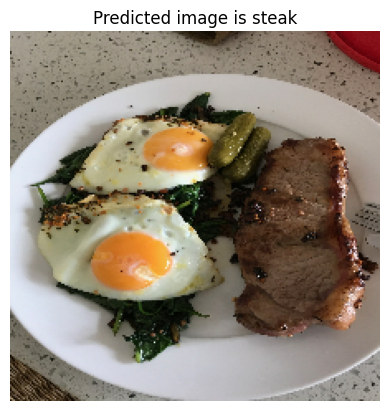

In [329]:
predict_and_plot(model_7, "../03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


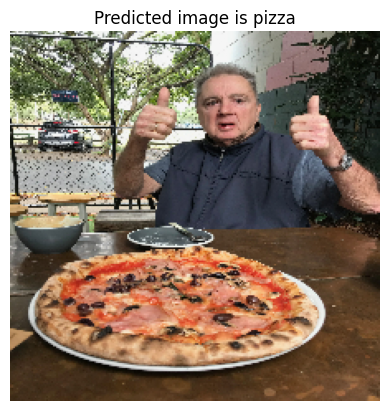

In [330]:
predict_and_plot(model_7, "../03-pizza-dad.jpeg", class_names)

In [331]:
# Now let's proceed with Multiclass CNN classification

# Multi-class Image Classification

## 1. Load the data

In [376]:
# Data can be downloaded from: https://github.com/mrdbourke/tensorflow-deep-learning/tree/main?tab=readme-ov-file

In [332]:
import os

# walk through the "10_food_classes" directory and list the number of files

for dirpath, dirnames, filenames in os.walk("../Datasets/10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ../Datasets/10_food_classes_all_data
There are 10 directories and 0 images in ../Datasets/10_food_classes_all_data/test
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/steak
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in ../Datasets/10_food_classes_all_data/test/ram

In [333]:
# Setup the train and test directories

train_dir = "../Datasets/10_food_classes_all_data/train"
test_dir = "../Datasets/10_food_classes_all_data/test"

In [338]:
import pathlib, numpy as np

data_dir = pathlib.Path(train_dir)
class_names_10 = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names_10

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


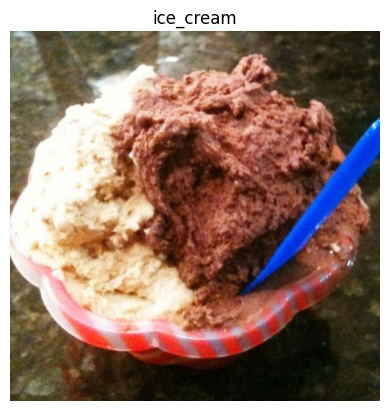

In [371]:
# Visualize

import random

img = view_random_image("../Datasets/10_food_classes_all_data/train/", target_class= random.choice(class_names_10))

## 2. Preprocess the data

In [375]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data into directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory="../Datasets/10_food_classes_all_data/train/",
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical", # we could actually omit it because this is by default
                                               )

test_data = test_datagen.flow_from_directory(directory="../Datasets/10_food_classes_all_data/test/",
                                               target_size = (224,224),
                                               batch_size= 32,
                                               class_mode = "categorical", # we could actually omit it because this is by default
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create the CNN model and 4. Fit the mode

In [383]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

model_8 = Sequential([
    Conv2D(10,3,activation="relu", input_shape = (224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )

history_8 = model_8.fit(train_data,
                        validation_data = test_data,
                        epochs = 5
                        )

Epoch 1/5


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.1441 - loss: 2.3231 - val_accuracy: 0.2552 - val_loss: 2.0819
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.3281 - loss: 1.9395 - val_accuracy: 0.3156 - val_loss: 1.9624
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.4550 - loss: 1.6313 - val_accuracy: 0.3020 - val_loss: 2.1149
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.6225 - loss: 1.1232 - val_accuracy: 0.3024 - val_loss: 2.2668
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8241 - loss: 0.5700 - val_accuracy: 0.2764 - val_loss: 2.9661


## 5. Evaluate the model

In [384]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.2776 - loss: 3.0052


[2.9660730361938477, 0.27639999985694885]

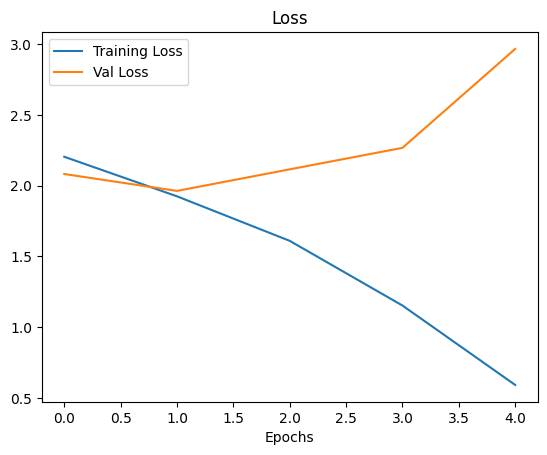

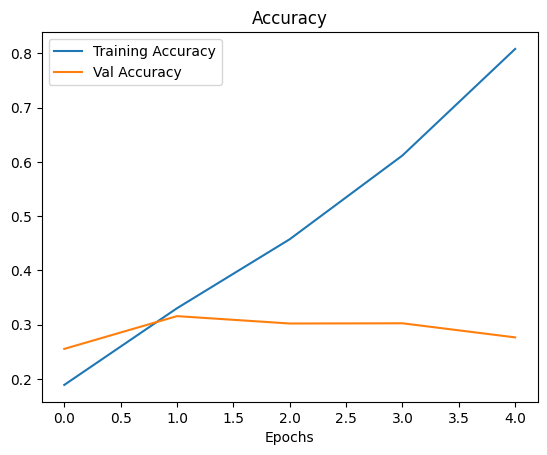

In [385]:
plot_loss_curves(history_8)

### 6. Adjust the hyperparameters to reduce overfitting

In [386]:
# let's try to simplify the model first

model_9 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
                        validation_data = test_data,
                        epochs = 5
                        )

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.1556 - loss: 2.3236 - val_accuracy: 0.3172 - val_loss: 1.9427
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.4020 - loss: 1.7638 - val_accuracy: 0.3412 - val_loss: 1.8865
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.5730 - loss: 1.3444 - val_accuracy: 0.3408 - val_loss: 1.9115
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.7669 - loss: 0.8082 - val_accuracy: 0.3288 - val_loss: 2.2581
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.8935 - loss: 0.4254 - val_accuracy: 0.3272 - val_loss: 2.6214


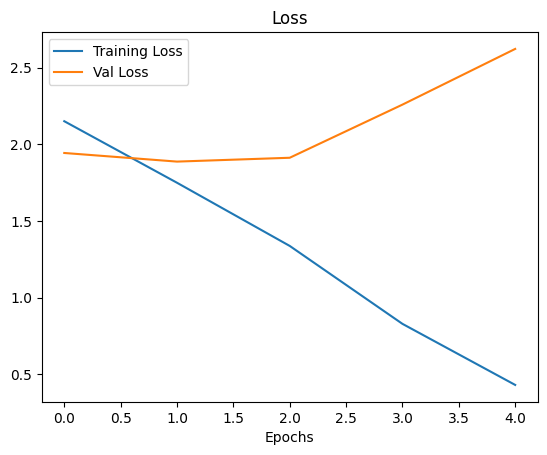

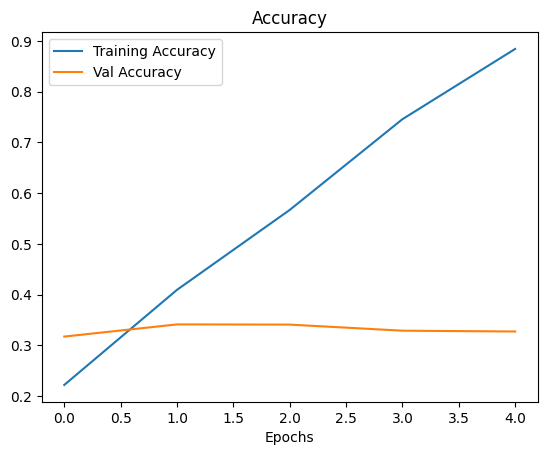

In [387]:
plot_loss_curves(history_9)

In [389]:
# this past model_9 did not really improve.

# let's try now to use data augmentation

### Trying to reduce overfitting with data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                          rotation_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_model = 'categorical')


In [393]:
# Let's create another model from a previous model but train it on the augmented data

model_10 = tf.keras.models.clone_model(model_8)

#compile the clone model

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

In [394]:
model_10.summary()

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_218 (Conv2D)             │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_219 (Conv2D)             │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_109               │ (None, 110, 110, 10)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_220 (Conv2D)             │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_221 (Conv2D)             │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 53, 53, 10)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_67 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [395]:
history_10 = model_10.fit(train_data,
                          validation_data = test_data,
                          epochs = 5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.1865 - loss: 2.2045 - val_accuracy: 0.2984 - val_loss: 1.9529
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.3573 - loss: 1.8647 - val_accuracy: 0.3468 - val_loss: 1.8497
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.4937 - loss: 1.5298 - val_accuracy: 0.3380 - val_loss: 1.9167
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.7288 - loss: 0.8894 - val_accuracy: 0.3172 - val_loss: 2.3011
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 206ms/step - accuracy: 0.9160 - loss: 0.3162 - val_accuracy: 0.2944 - val_loss: 3.4717


## Repeat until satisfied

* increasing hidden layers/ units
* adjust learning rate
* different data augmentation methods: adjusting hyperparameters in ImageDataGenerator instance
* train for longer (maybe 10 epochs)
* try transfer learning

### Make a prediction with our trained model

In [396]:
class_names_10

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [416]:
# Reconfig predic_and_plot() to work with more than binary classification

def predict_and_plot_multiclass(model, filename, class_names):
    #import the image with tensorflow and return as tensor
    img = load_and_preprocess_data(filename)

    #predict with the tensor, but expand dimensions because previous function gives 3 dimensions but missing batch_size ('None' for only 1 pic)
    prediction = model.predict(tf.expand_dims(img, axis = 0))
    print(np.max(prediction))

    # get the correct class name from class_names
    predicted_class = class_names[int(tf.round(np.max(prediction)))]   # in course he did something longer, but just with np.max() it is solved

    #Plot the image
    plt.imshow(img)
    plt.title(f"Predicted image is {predicted_class}")
    plt.axis(False)
    plt.plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.40701032


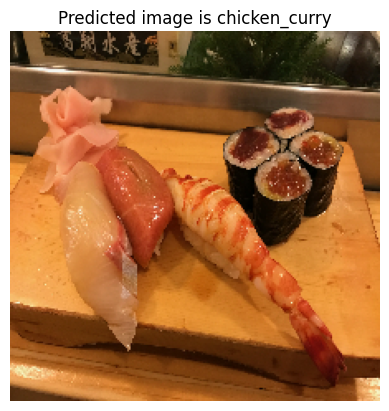

In [417]:
# make a prediction on custom data with our model (using a function)

predict_and_plot_multiclass(model= model_10, filename= '../03-sushi.jpeg', class_names= list(class_names_10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.9213423


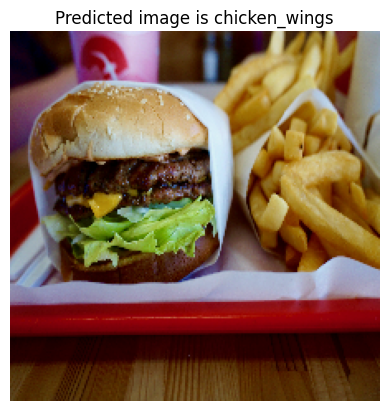

In [418]:
predict_and_plot_multiclass(model= model_10, filename= '../03-hamburger.jpeg', class_names= list(class_names_10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0.8652339


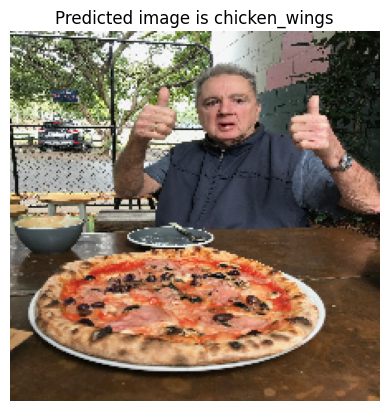

In [419]:
predict_and_plot_multiclass(model= model_10, filename= '../03-pizza-dad.jpeg', class_names= list(class_names_10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.6766532


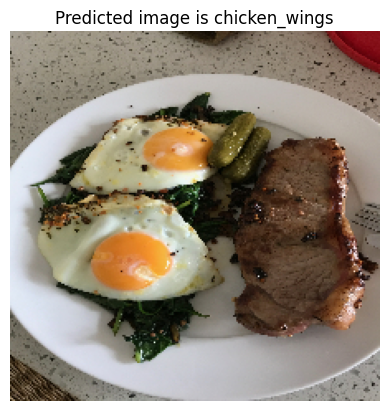

In [420]:
predict_and_plot_multiclass(model= model_10, filename= '../03-steak.jpeg', class_names= list(class_names_10))

In [421]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2968 - loss: 3.5073


[3.4716832637786865, 0.29440000653266907]

### The model didn't performed that well, with only about 30% accuracy. We will improve in next module.

## Save and load model

In [425]:
# Save a model

model_10.save("models/03_computer_vision/saved_trained_model_10.keras")

In [426]:
# Load a model

loaded_model = tf.keras.models.load_model("models/03_computer_vision/saved_trained_model_10.keras")

In [427]:
loaded_model.summary()

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_218 (Conv2D)             │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_219 (Conv2D)             │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_109               │ (None, 110, 110, 10)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_220 (Conv2D)             │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_221 (Conv2D)             │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 53, 53, 10)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_67 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [428]:
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.3010 - loss: 3.3952


[3.471684455871582, 0.29440000653266907]

# FINISH! YAY